In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
accident = pd.read_csv('accident.csv',encoding='cp949')
accident

,사고유형대분류,사고유형중분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,1,1532,69,841,650,61
1,차대사람,횡단중,횡단중,2,1201,40,599,594,39
2,차대사람,횡단중,횡단중,3,1453,47,736,709,61
3,차대사람,횡단중,횡단중,4,1604,55,778,783,73
4,차대사람,횡단중,횡단중,5,1516,61,751,715,85
...,...,...,...,...,...,...,...,...,...
205,철길건널목,철길건널목,철길건널목,6,1,0,1,0,0
206,철길건널목,철길건널목,철길건널목,7,1,0,2,0,0
207,철길건널목,철길건널목,철길건널목,8,1,0,1,0,0
208,철길건널목,철길건널목,철길건널목,9,1,2,0,0,0


# 데이터 설명 
### 주제 : 교통사고 통계

파일명 : 도로교통공단_사고유형별 월별 교통사고 통계

출처 : 공공데이터포털

p.s. 경찰에서 조사, 처리한 교통사고에 대한 통계 정보로 인적 피해가 있는 사고만 집계 됨

- 사고 유형 대분류 
- 사고 유형 중분류
- 사고 유형
- 월
- 사고건수
- 사망자수
- 중상자수
- 경상자수
- 부상신고자수

##### ★ 탐색 및 분석 포인트
우리나라 교통사고 유형과 부상 및 사망 정도를 비교하여 어느 유형이 가장 많은 사고량을 내었는지, 어느 사고가 가장 위험한지 등 앞으로의 사고에 예방할 수 있는 의미를 도출 할 수 있는 데이터 분석을 진행해보겠습니다.

In [20]:
# 중복되는 칼럼 제거

ac = accident.drop(["사고유형중분류"],1)
ac.head()

,사고유형대분류,사고유형,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,1,1532,69,841,650,61
1,차대사람,횡단중,2,1201,40,599,594,39
2,차대사람,횡단중,3,1453,47,736,709,61
3,차대사람,횡단중,4,1604,55,778,783,73
4,차대사람,횡단중,5,1516,61,751,715,85


In [21]:
# 컬럼 이름 다시 지정해주기 
# 시각화 시 한글깨짐 현상을 대비하기 위함 

ac=ac.rename(columns = {
        '사고유형대분류':'large type of accident',
        '사고유형':'type of accident',
        '월':'month',
        '사고건수':'number of accident',
        '사망자수':'number of death',
        '중상자수':'number of serious injury',
        '경상자수':'number of slight injury',
        '부상신고자수':'number of report injury'})
ac

,large type of accident,type of accident,month,number of accident,number of death,number of serious injury,number of slight injury,number of report injury
0,차대사람,횡단중,1,1532,69,841,650,61
1,차대사람,횡단중,2,1201,40,599,594,39
2,차대사람,횡단중,3,1453,47,736,709,61
3,차대사람,횡단중,4,1604,55,778,783,73
4,차대사람,횡단중,5,1516,61,751,715,85
...,...,...,...,...,...,...,...,...
205,철길건널목,철길건널목,6,1,0,1,0,0
206,철길건널목,철길건널목,7,1,0,2,0,0
207,철길건널목,철길건널목,8,1,0,1,0,0
208,철길건널목,철길건널목,9,1,2,0,0,0


In [25]:
ac.columns.values # 컬럼 확인

array(['large type of accident', 'type of accident', 'month',
       'number of accident', 'number of death',
       'number of serious injury', 'number of slight injury',
       'number of report injury'], dtype=object)

In [22]:
type(ac) #데이터프레임 형태

pandas.core.frame.DataFrame

In [26]:
ac.isnull().any().any() # 전체 데이터셋 속 결측치는 없음

False

In [23]:
ac.info() # 전체적 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   large type of accident    210 non-null    object
 1   type of accident          210 non-null    object
 2   month                     210 non-null    int64 
 3   number of accident        210 non-null    int64 
 4   number of death           210 non-null    int64 
 5   number of serious injury  210 non-null    int64 
 6   number of slight injury   210 non-null    int64 
 7   number of report injury   210 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 13.2+ KB


In [24]:
ac.describe().T # 평균,최대,최소 등 확인

,count,mean,std,min,25%,50%,75%,max
month,210.0,6.490476,3.446433,1.0,3.25,6.5,9.00,12.0
number of accident,210.0,1093.333333,1795.046438,1.0,42.00,293.5,1448.50,7806.0
number of death,210.0,15.947619,16.758690,0.0,2.25,10.0,24.75,69.0
number of serious injury,210.0,344.314286,509.755065,0.0,22.50,120.0,536.75,2313.0
number of slight injury,210.0,1169.161905,2206.423240,0.0,19.25,200.5,780.75,9222.0
number of report injury,210.0,113.723810,196.304494,0.0,7.00,25.0,80.75,836.0


# 월별 사고건수 비교 

In [36]:
ac.groupby(['month'])['number of accident'].describe().T # 월별 사고건수의 평균,최대,최소

month,1,2,3,4,5,6,7,8,9,10,11,12
count,17.000000,18.000000,18.000000,17.000000,17.000000,18.000000,18.000000,17.000000,18.000000,18.000000,17.000000,17.000000
mean,973.647059,819.555556,1007.388889,1123.764706,1222.294118,1053.777778,1068.555556,1176.000000,1073.944444,1205.000000,1265.705882,1149.882353
std,1548.935519,1396.238359,1729.487110,1861.186400,2040.059030,1827.735389,1853.017102,1983.787129,1816.328924,2045.562284,2034.125603,1846.061344
min,3.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000
25%,35.000000,41.750000,52.750000,77.000000,145.000000,51.500000,52.500000,105.000000,57.500000,56.500000,101.000000,76.000000
50%,242.000000,217.000000,284.500000,305.000000,326.000000,295.500000,287.000000,319.000000,289.000000,307.000000,304.000000,297.000000
75%,1507.000000,956.750000,1162.500000,1435.000000,1516.000000,1179.000000,1209.750000,1372.000000,1287.250000,1450.750000,1730.000000,1630.000000
max,5641.000000,5397.000000,6828.000000,7110.000000,7781.000000,7095.000000,7151.000000,7504.000000,6966.000000,7806.000000,7450.000000,6779.000000


<AxesSubplot:xlabel='month'>

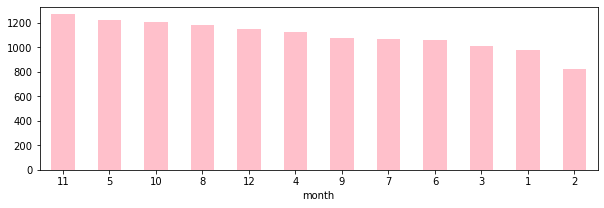

In [81]:
# 사고건수가 가장 많은 달부터 나열
import warnings
warnings.filterwarnings('ignore')
g = ac.groupby(['month'])['number of accident'].mean().sort_values(ascending = False)
g.plot(kind='bar',color = 'pink',rot=0,figsize=(10,3))

# 사고 유형별 사망자수 비교

In [28]:
# 사고 유형별 사망자수 비교 - 내림차순

ac_d = ac.groupby('type of accident')['number of death'].sum().sort_values(ascending = False)
# 사고 유형별 사망자수의 합계
ac_d

type of accident
기타            716
횡단중           652
측면충돌          553
추돌            379
공작물충돌         318
정면충돌          215
차도통행중         180
전도             98
도로이탈 추락        98
길가장자리구역통행중     41
보도통행중          37
전복             36
도로이탈 기타        18
주/정차차량 충돌       5
철길건널목           2
후진중충돌           1
Name: number of death, dtype: int64

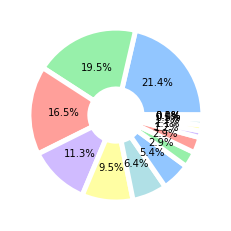

In [82]:
# 사고 유형별 사망자수 시각화
import warnings
warnings.filterwarnings('ignore')
plt.style.use("seaborn-pastel")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ac_d,autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()

# 상관관계 찾기

In [84]:
ac.corr(method='pearson') # 컬럼 별 상관관계

,month,number of accident,number of death,number of serious injury,number of slight injury,number of report injury
month,1.000000,0.047237,0.062246,0.036818,0.040522,0.066538
number of accident,0.047237,1.000000,0.668992,0.983467,0.983215,0.985878
number of death,0.062246,0.668992,1.000000,0.768058,0.589833,0.596626
number of serious injury,0.036818,0.983467,0.768058,1.000000,0.947131,0.948879
number of slight injury,0.040522,0.983215,0.589833,0.947131,1.000000,0.986010
number of report injury,0.066538,0.985878,0.596626,0.948879,0.986010,1.000000


<AxesSubplot:>

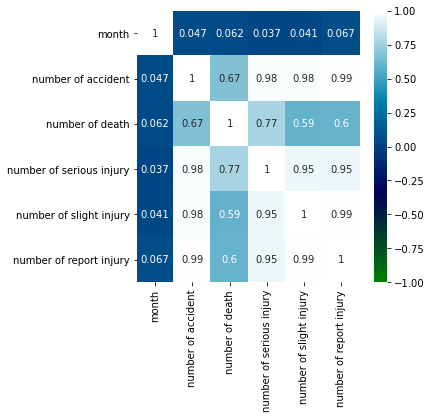

In [85]:
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(ac.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'ocean', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

heatmap을 봤을때, 
- 사고건수 - 부상신고자수
- 경상자수 - 부상신고자수 

이 0.99로 상관도가 가장 높음을 확인


<AxesSubplot:xlabel='number of slight injury', ylabel='number of report injury'>

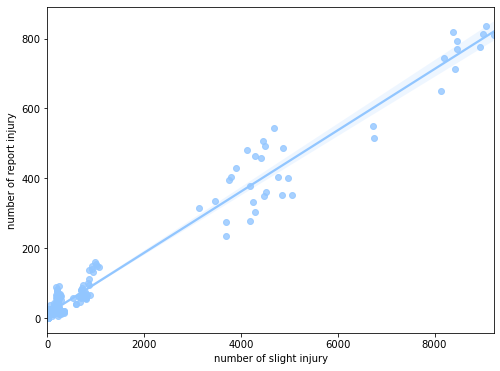

In [88]:
# 경상자수와 부상신고자수 비례 관계 확인

plt.figure(figsize = (8,6))
sns.regplot(x= ac["number of slight injury"].astype(int),y = ac["number of report injury"].astype(int))

# 사고 유형별 사고건수의 비교

In [57]:
# 사고 유형별 사고건수의 합
type_sum = ac.groupby(['type of accident'])['number of accident'].sum().sort_values(ascending = False)
t_s = pd.DataFrame(type_sum)
t_s

,number of accident
type of accident,
측면충돌,83508
기타,67186
추돌,34981
횡단중,18101
정면충돌,7331
차도통행중,4765
공작물충돌,3586
후진중충돌,3075
길가장자리구역통행중,2705


<AxesSubplot:xlabel='type of accident'>

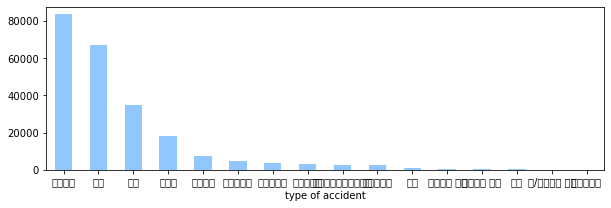

In [83]:
# 가장 많이 일어나는 사고 유형 나열
import warnings
warnings.filterwarnings('ignore')
t = ac.groupby(['type of accident'])['number of accident'].sum().sort_values(ascending = False)
t.plot(kind='bar',rot=0,figsize=(10,3))

# 분석 결과 및 의미 도출

우리나라 교통사고 통계는 1년 내내 비슷한 확률로 일어나며, 일수가 가장 적은 2월이 그나마 가장 낮은 사고량을 보였습니다.
측면 충돌이 가장 흔한 사고이고 횡단 중 사고시 사망 확률이 가장 높습니다.
또, 컬럼들은 모두 양의 상관관계를 띄어 전부 관계가 있음을 나타냈고, 특히 경상자수와 부상신고자수가 높은 상관관계를 띄고 있습니다.

어떠한 교통사고를 예방하는 것이 가장 효율적인지 예측할 수 있고
사고 시 최대한 부상 및 피해 정도를 줄이기 위해 어떠한 사고 유형에 대비 해야하는지에 도움을 줄 수 있습니다.

분석 중 측면 충돌이 많은 점은 정면보다 사이드 부분이 시야가 더 좁기 때문이라 생각하여 사이드 시야를 넓힐 수 있는 방법을 도로나 차량 생산시 고려를 해보면 좋을 것이라는 생각도 해볼 수 있겠습니다.

# 아쉬웠던 점/느낀점
힘들었던 부분은 사망,중상,경상,부상의 전체적인 비교가 힘들었다는 점이 있습니다. 좀더 공부를 하여 n:n 비교를 하는 법을 익히고 싶습니다.

또, 사고유형 대분류를 분석에 이용하지 못했다는 아쉬움이 남았습니다.

처음 데이터를 선정할 시 전처리부터 의미까지 생각하며 데이터를 수집하는 과정에 시간을 많이 쏟았던 것 같습니다. 좀 더 실력을 쌓아 다양한 형태의 데이터를 자유롭게 분석해보고 싶습니다.
이번 데이터는 전처리 할 부분이 거의 없어 다양한 전처리 기법을 이용해 보지 못했음에 아쉬움을 느꼈습니다. 다음에는 보다 복잡한 데이터를 이용한 전처리 역량을 강화해보고 싶습니다.

이번 분석 프로젝트를 통해 시각화의 중요성을 깨달았고, 직접 데이터 수집부터 탐색 전처리 분석 시각화 까지 하는 부분에서 데이터 분석의 제대로된 흐름을 잡을 수 있던 귀중한 시간이었습니다.
